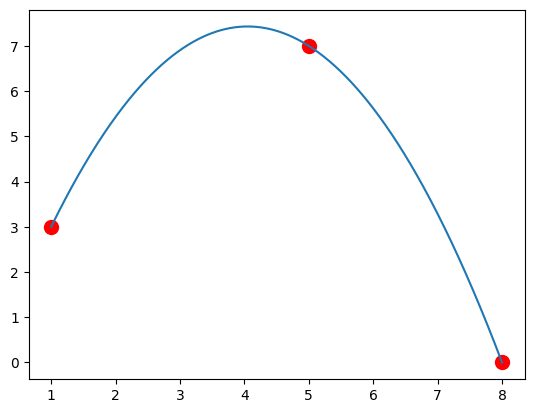

In [1]:
import numpy as np

import matplotlib.pyplot as plot

x=[1,5,8]
y=[3,7,0]
n=len(x)-1
prange = np.linspace(min(x),max(x),500)

plot.plot(x,y,marker='o', color='r', ls='', markersize=10)

def f(o):
  b0=y[0]
  b1=(y[1]-y[0])/(x[1]-x[0])
  b1p=(y[2]-y[1])/(x[2]-x[1])
  b2=(b1p-b1)/(x[2]-x[0])
  poly=b0+b1*(o-x[0])+b2*(o-x[0])*(o-x[1])
  return poly



plot.plot(prange,f(prange))
plot.show()

## Using Recursion

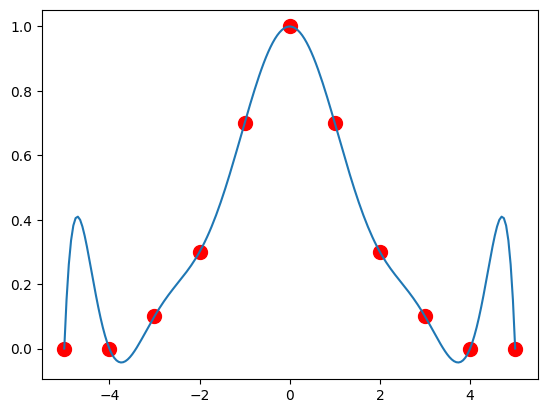

In [2]:
import numpy as np
import matplotlib.pyplot as plot
x=[-5,-4,-3,-2,-1,0,1,2,3,4,5]
y=[0,0,0.1,0.3,0.7,1,0.7,0.3,0.1,0,0]
plot.plot(x,y,marker='o', color='r', ls='',markersize=10)

def grad(a,b):
    if a==0: return y[b]
    return (grad(a-1,b)- grad(a-1,a-1))/(x[b]-x[a-1])

def f(o):
    yres=0
    for p in range(len(x)):
        prodres=grad(p,p)
        for q in range(p):
            prodres*=(o-x[q])
        yres+=prodres
    return yres

prange=np.linspace(x[0],x[-1],200)
plot.plot(prange,f(prange))
plot.show()

## Using Table

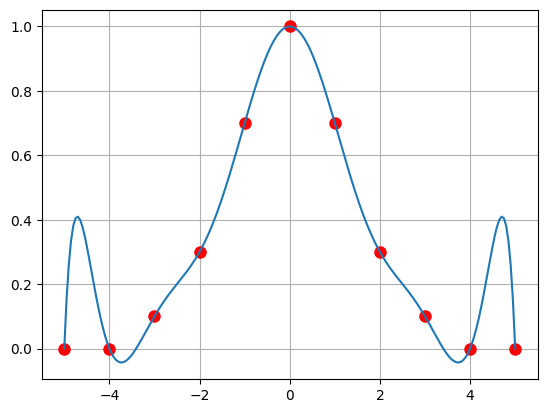

In [3]:
import numpy as np
import matplotlib.pyplot as plot

x = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
y = [0, 0, 0.1, 0.3, 0.7, 1, 0.7, 0.3, 0.1, 0, 0]

plot.plot(x, y, 'ro', markersize=8)

n = len(x)
table = np.zeros((n, n + 1))
table[:, 0] = x
table[:, 1] = y

for col in range(2, n + 1):
    for row in range(n - col + 1):
        table[row, col] = (table[row + 1, col - 1] - table[row, col - 1]) / (table[row + col - 1, 0] - table[row, 0])

def newton_interp(t, xq):
    res = []
    for x in xq:
        val, prod = t[0, 1], 1
        for i in range(2, len(t) + 1):
            prod *= (x - t[i - 2, 0])
            val += t[0, i] * prod
        res.append(val)
    return res

xp = np.linspace(x[0], x[-1], 200)
plot.plot(xp, newton_interp(table, xp))
plot.grid()
plot.show()
